INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Plots.ji for module Plots.


[Plots.jl] Default backend: immerse
[Plots.jl] Initializing backend: immerse

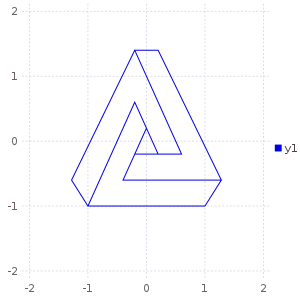

In [1]:
using Plots
pts = [
    (-2.5, 2.5),
    (-3.2, 1.5),
    (-0.5, -3.5),
    (0.5, -3.5),
    (3.2, 1.5),
    (2.5, 2.5),
    (-2.5, 2.5),
    (-0.5, -1.5),
    (0.0, -0.5),
    (-1.0, 1.5),
    (3.2, 1.5),
    (0.5, -3.5),
    (-0.5, -3.5),
    (1.5, 0.5), 
    (-0.5, 0.5),
    (0.0, -0.5),
    (0.5, 0.5)
]

scalar = 1 / 2.5
pts = [(x*scalar, y*scalar) for (x,y) in pts]

x, y = Float64[x for (x,y) in pts], Float64[y for (x,y) in pts]

plot(x,-y, xlim=(-2,2), ylim=(-2,2), size=(300,300))

[Plots.jl] Initializing backend: immerse

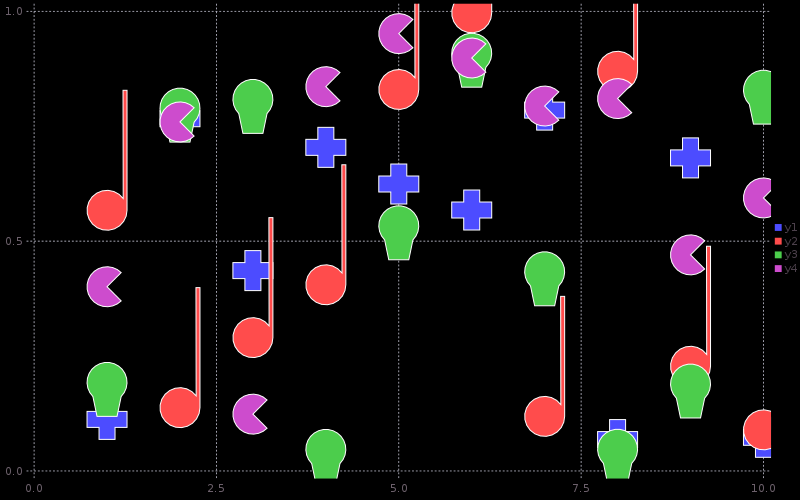

In [2]:
using Plots
default(size=(800,500))

partialcircle(start_θ, end_θ, n = 20, r=1) = [(r*cos(u),r*sin(u)) for u in linspace(start_θ, end_θ, n)]

# create coordinates for the shapes
musicnote = Shape(vcat(partialcircle(0, 1.8π), (0.8, -6), (1, -6)))
lightbulb = Shape(vcat(partialcircle(0.75π, 2.25π), (0.5,1.7), (-0.5,1.7)))
pacman = Shape(vcat(partialcircle(0.25π, 1.75π), (0.,0.)))

# the Shape type wraps vertices of a polygon
# note: the area should be approximately the area of the unit circle if you want the size to look ok
scatter(rand(10,4), shape=[:+ musicnote lightbulb pacman], ms=20, bg=:black)

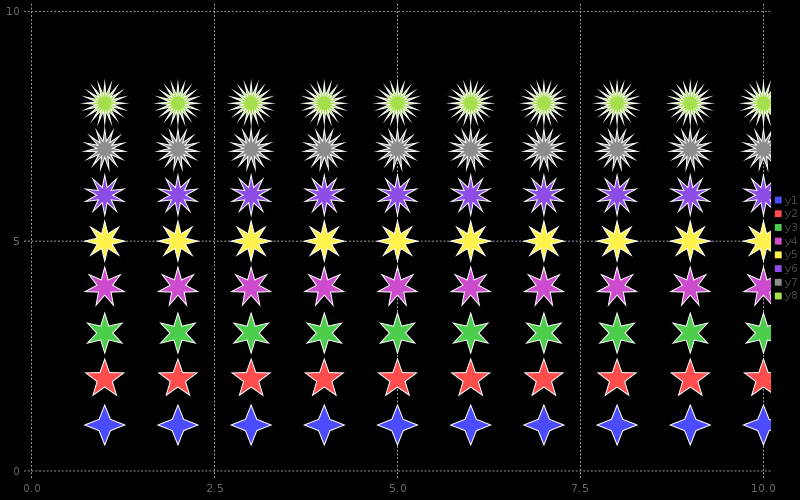

In [22]:
using Plots
function weave(x,y)
    ret = eltype(x)[]
    done = false
    while !done
        try
            push!(ret, shift!(x))
        end
        try
            push!(ret, shift!(y))
        end
        done = isempty(x) && isempty(y)
    end
    ret
end

function makestar(n=5)
    first1 = -0.5π
    first2 = first1 + π / (n)
    star1 = partialcircle(first1, first1 + 2π, n+1)
    star2 = partialcircle(first2, first2 + 2π, n+1, 0.4)
    star = Shape(weave(star1, star2)[1:end-2])
end

rng = [4,5,6,7,8,10,15,20]
scatter(repmat((1:length(rng))',10,1), shape=[makestar(i) for i in rng]', ms=20, bg=:black, ylim=(0,10))

In [1]:
using Plots

function makeshape(n=5, offset = -0.5)
    z = offset * π
    Shape(Plots.partialcircle(z,z+2π,n+1)[1:end-1])
end

function makecross(; offset = -0.5, radius = 1.0)
    z2 = offset * π
    z1 = z2 - π/8
#     z1 = -0.5 * π - π/8
#     z2 = offset * π
    @show z1/π,z2/π
    outercircle = Plots.partialcircle(z1, z1 + 2π, 9, radius)
    innercircle = Plots.partialcircle(z2, z2 + 2π, 5, 0.4radius)
    Shape(weave(outercircle, innercircle)[1:end-2], ordering=Any[outercircle,outercircle,innercircle])
#     Shape(outercircle[1:end])
end

rng = [3,4,5,6,7,8]
rng = [-0.5,-0.375]
scatter(repmat((1:length(rng))',10,1), shape=[makecross(offset=i) for i in rng]', ms=20, bg=:black, ylim=(0,7))

INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Plots.ji for module Plots.
ERROR: LoadError: LoadError: syntax: missing comma or ) in argument list
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 [inlined code] from none:2
 in anonymous at no file:0
 in process_options at ./client.jl:284
 in _start at ./client.jl:411
while loading /home/tom/.julia/v0.4/Plots/src/types.jl, in expression starting on line 108
while loading /home/tom/.julia/v0.4/Plots/src/Plots.jl, in expression starting on line 98


LoadError: LoadError: Failed to precompile Plots to /home/tom/.julia/lib/v0.4/Plots.ji
while loading In[1], in expression starting on line 1

In [ ]:
using Plots; pyplot()
lim = (-5,5)
ellipse = EllipseRecipe(1, 4.5, 2, -1, 0.1π)
plot(ellipse, xlim=lim, ylim=lim, size=(400,400),leg=false)

[Plots.jl] Switched to backend: pyplot
[Plots.jl] Initializing backend: pyplot

In [119]:
using Plots
gadfly()
default(leg=false,size=(400,400));
n = 100
x = randn(n) * 2 + 1
y = randn(n) * 1 + x + 4
scatter(x, y, c=:orange, m=4);

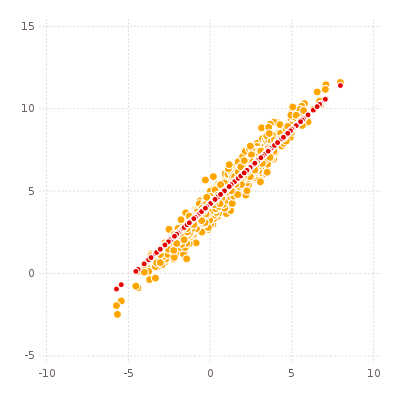

In [91]:
using OnlineStats
matx = reshape(x,n,1)
reg = SGModel(matx, y)
yhat = predict(reg, matx)
scatter!(x,yhat,m=3)

In [120]:
using OnlineStats, MultivariateStats
c = CovarianceMatrix([x y])
p = pca(c)
w,h = 1.96 * sqrt(principalvars(p))
projection(p)

2x2 Array{Float64,2}:
 0.707107  -0.707107
 0.707107   0.707107

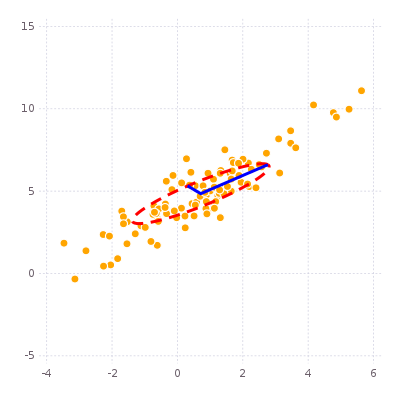

In [121]:

mx, my, c = mean(x), mean(y), cor(x,y)
U, S, V = svd([x y-my])
#w, h = sqrt(S)
#w, h = 1.96 * std([x y] * V, 1)
ep = EllipseRecipe(w, h, mx, my, 2π - 0.25π*c)
plot!(ep)

In [99]:
U,S,V = svd([x y])
std([x y] * V,1)

1x2 Array{Float64,2}:
 2.66054  1.29587